<a href="https://colab.research.google.com/github/leobezlel/excelr-assignments/blob/main/Assignment_12_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
import pandas as pd
df = pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')
df.shape

(908, 13)

In [ ]:
print(df.head)

<bound method NDFrame.head of      age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               th

In [ ]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
# Check for outliers
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


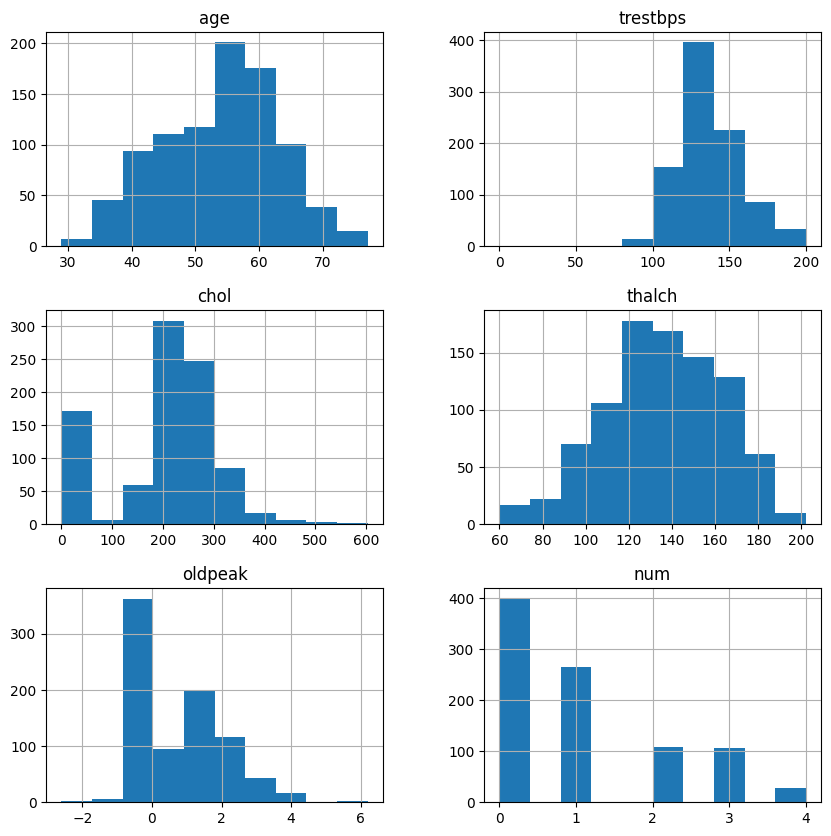

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10), bins=10)
plt.show()

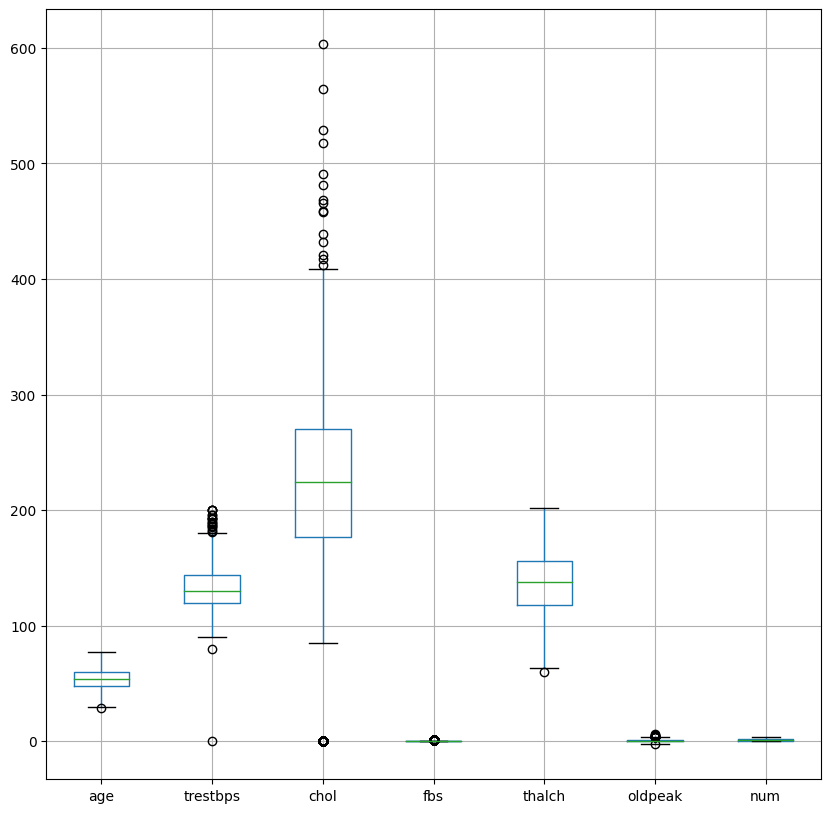

In [ ]:
'''box plot'''
df.boxplot(figsize=(10, 10))
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Correlation matrix for numerical variables
num_corr = df[num_cols].corr()

# Display the correlation matrix
print("Correlation matrix for numerical variables:")
display(num_corr)

Correlation matrix for numerical variables:


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Handling missing values
df.fillna(df.mean(), inplace=True)

In [ ]:
# Check for missing values
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [ ]:
# Split the dataset into training and testing
df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7417582417582418
Precision: 0.7360675039246467
Recall: 0.7417582417582418
F1 Score: 0.7387042187241366
ROC-AUC: 0.6419302514193025


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}

# Create a DecisionTreeClassifier instance
dt_clf = DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


[[117  20]
 [ 31  14]]


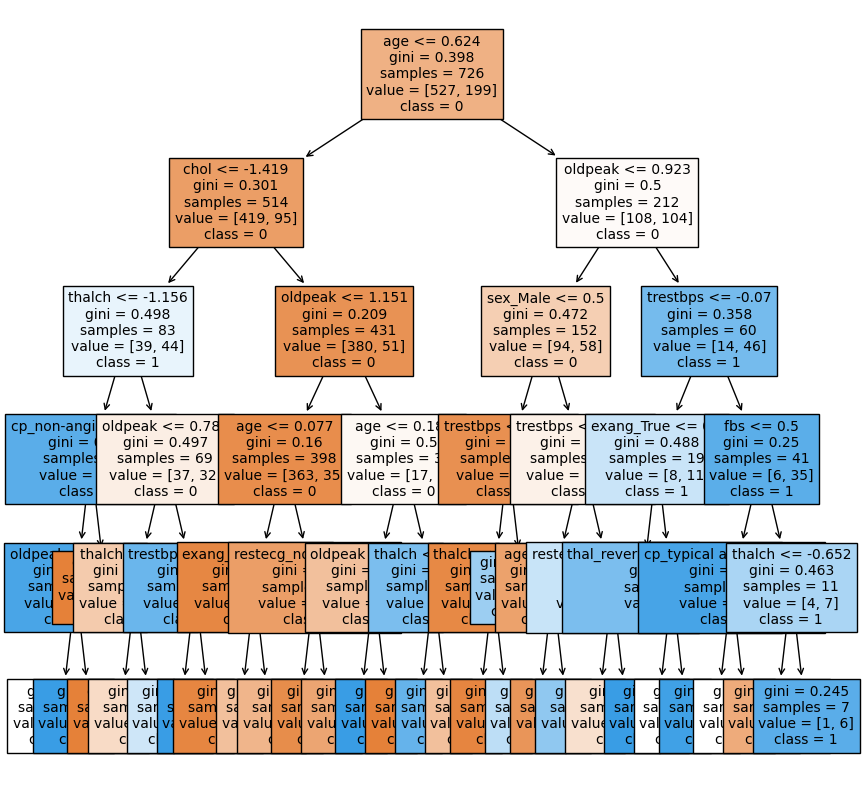

age: 0.27130054253654096
trestbps: 0.09141206549562447
chol: 0.17860318004271025
fbs: 0.01074230711916792
thalch: 0.0685070998487184
oldpeak: 0.23193050323713602
sex_Male: 0.055349375905845134
cp_atypical angina: 0.0
cp_non-anginal: 0.011973863801264853
cp_typical angina: 0.006089485826708078
restecg_normal: 0.04067271963448049
restecg_st-t abnormality: 0.0
exang_True: 0.014422466431677005
exang_FALSE: 0.00764616505851074
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.011350225061615633


In [ ]:
import matplotlib.pyplot as plt
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()

# Feature importance
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

In [ ]:
# Evaluate the model performance using the obtained metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


Interview Questions:

1)What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

criterion: Determines the function used to measure the quality of a split. Common options are:


'gini': Gini impurity.

'entropy': Information gain based on entropy.

max_depth: Maximum depth of the tree. Limits how deep the tree can grow. A smaller depth prevents overfitting but might underfit, while a larger depth may overfit.


min_samples_split: Minimum number of samples required to split an internal node. Increasing this number prevents the model from learning overly specific patterns, thus reducing overfitting.


min_samples_leaf: Minimum number of samples required to be at a leaf node. Ensures that leaf nodes have enough samples to make the decision reliable.


max_features: Number of features to consider when looking for the best split. Reducing this number can help with overfitting and increase model robustness by introducing randomness.


max_leaf_nodes: Maximum number of leaf nodes in the tree. Limits the number of terminal nodes in the tree and can help with controlling overfitting.


min_impurity_decrease: A node will only be split if the impurity decrease is greater than this value. Helps in controlling the tree growth and complexity.


These hyperparameters impact the model’s performance by controlling the tree’s complexity, affecting its ability to generalize to unseen data.




2)What is the difference between the Label encoding and One-hot encoding?


Label Encoding:


What: Converts categorical values into numerical labels.

How: Each unique category value is assigned an integer value (e.g., 'Red' -> 0, 'Green' -> 1, 'Blue' -> 2).

Pros: Simple and efficient for models that can handle categorical data as numerical values.

Cons: Implies an ordinal relationship between categories that may not exist, potentially leading to misleading interpretations for certain algorithms.



One-Hot Encoding:


What: Converts categorical values into a binary matrix (one column per category).

How: Each category is represented by a binary vector where only one element is 1 (the index of the category), and all others are 0 (e.g., for 'Red', [1, 0, 0]; for 'Green', [0, 1, 0]; for 'Blue', [0, 0, 1]).

Pros: Avoids the implication of ordinality and is more suitable for algorithms that do not handle categorical data directly.

Cons: Can lead to high-dimensional data if there are many unique categories, potentially increasing computational cost and risk of overfitting.